In [30]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Load the Zachary's Karate Club graph
G = nx.karate_club_graph()




In [31]:
# Create the graph in cytoscape json format
data = {"nodes": [],  "edges": []}
for node in G.nodes():
    data["nodes"].append({"data": {"id": str(node)}})
for edge in G.edges():
    data["edges"].append({"data": {"source": str(edge[0]), "target": str(edge[1])}})

with open('graph.json', 'w') as json_file:
    json.dump(data, json_file)


In [32]:
# Load the graph from the json file
def load_graph(filepath):
    with open(filepath) as json_file:
        data = json.load(json_file)
        nodes = data['nodes']
        edges = data['edges']
        # create a dictionary to store the graph
        graph = {str(node['data']['id']): [] for node in nodes}
        for edge in edges:
            source = edge['data']['source']
            target = edge['data']['target']
            graph[source].append(target)
            graph[target].append(source)
    return nx.from_dict_of_lists(graph)

G = load_graph('graph.json')



In [33]:
# Find the most influencer node
def find_influencer(graph):
    eigenvec_centrality = nx.eigenvector_centrality(graph)
    max_eigenvec = max(eigenvec_centrality, key=eigenvec_centrality.get)
    return max_eigenvec

influencer = find_influencer(G)
print("The most influencer node is: ", influencer)



The most influencer node is:  33


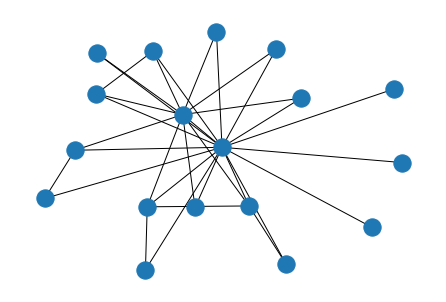

In [34]:
# Extract the ego network of the influencer node
ego_network = nx.ego_graph(G, influencer)
nx.draw(ego_network)
plt.show()



In [35]:
# Find the Friendship index of the ego network
def friendship_index(ego_network):
    edges = ego_network.number_of_edges()
    nodes = ego_network.number_of_nodes()
    return edges/(nodes*(nodes-1)/2)

fi = friendship_index(ego_network)
print("The friendship index of the ego network is: ", fi)



The friendship index of the ego network is:  0.20915032679738563


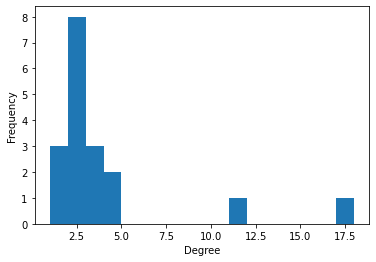

In [36]:
#Plot the degree distribution of the nodes

degree_sequence = [d for n, d in ego_network.degree()]
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence) + 2, 1))
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()





In [37]:
#Find specific findings from the degree distribution

degree_centrality = nx.degree_centrality(ego_network)
max_degree = max(degree_centrality, key=degree_centrality.get)
print("The node with the highest degree centrality is: ", max_degree)
print("The degree centrality of this node is: ", degree_centrality[max_degree])

average_degree = sum(degree_sequence) / len(degree_sequence)
print("The average degree of the nodes in the ego network is: ", average_degree)



The node with the highest degree centrality is:  33
The degree centrality of this node is:  1.0
The average degree of the nodes in the ego network is:  3.5555555555555554


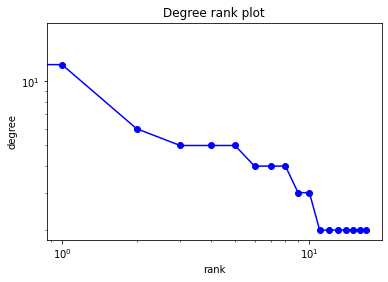

In [39]:
ego_nodes = nx.ego_graph(nx.Graph(G), influencer).nodes()
degree_sequence = [d[1] for d in nx.degree(nx.Graph(G)) if d[0] in ego_nodes]
degree_sequence = sorted(degree_sequence, reverse = True)
plt.loglog(degree_sequence, 'b-', marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")
plt.show()